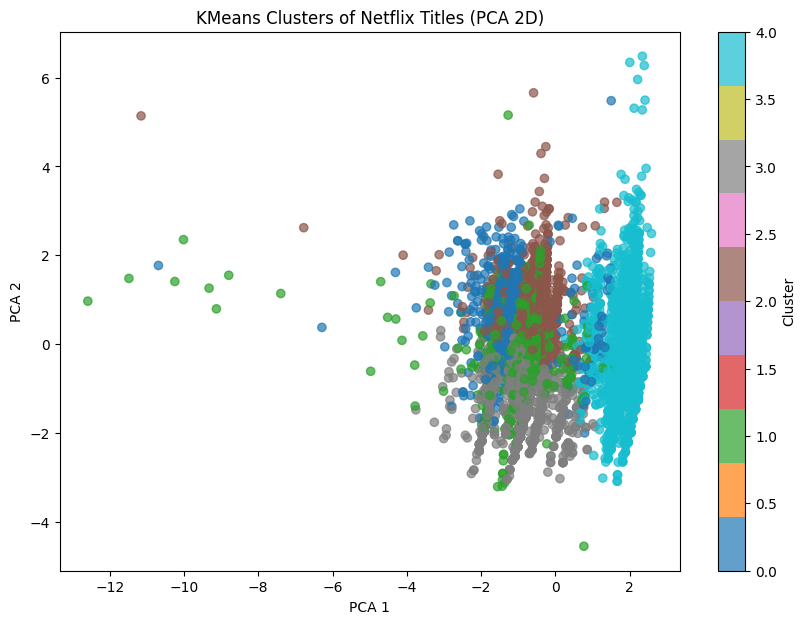

cluster  type   
0        Movie       374
         TV Show      70
1        Movie      1530
         TV Show      17
2        Movie      2575
         TV Show      22
3        Movie      1652
         TV Show      34
4        TV Show    2435
Name: count, dtype: int64
          count         mean       std     min     25%     50%     75%     max
cluster                                                                       
0         444.0  2018.797297  1.608216  2014.0  2018.0  2019.0  2020.0  2021.0
1        1547.0  2017.281189  1.171758  2008.0  2017.0  2018.0  2018.0  2019.0
2        2597.0  2019.937620  0.805388  2018.0  2019.0  2020.0  2021.0  2021.0
3        1686.0  2018.596679  1.482588  2013.0  2018.0  2019.0  2020.0  2021.0
4        2435.0  2019.007392  1.532430  2013.0  2018.0  2019.0  2020.0  2021.0


In [9]:
# 📌 IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 📌 LOAD RAW DATA
df = pd.read_csv("../data/raw/netflix_titles.csv")

# 📌 CLEAN DATE_ADDED AND EXTRACT YEAR
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# 📌 FEATURE ENGINEERING
df['num_countries'] = df['country'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
df['num_genres'] = df['listed_in'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
df['num_cast'] = df['cast'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
df['num_directors'] = df['director'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
df['type_num'] = df['type'].apply(lambda x: 0 if x == 'Movie' else 1)
df['duration_num'] = df['duration'].str.extract(r'(\\d+)').astype(float).fillna(0)

# 📌 REMOVE ROWS WITH MISSING YEAR (if desired)
df_clustering = df[df['year_added'].notnull()].copy()

# 📌 FEATURES FOR CLUSTERING
X = df_clustering[['type_num', 'num_countries', 'num_genres', 'num_cast', 'num_directors', 'year_added', 'duration_num']]

# 📌 SCALING
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 KMEANS CLUSTERING
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustering['cluster'] = clusters

# 📌 PCA FOR VISUALIZATION
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 📌 PLOT
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', alpha=0.7)
plt.title("KMeans Clusters of Netflix Titles (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

# 📌 CLUSTER SUMMARY
print(df_clustering.groupby('cluster')['type'].value_counts())
print(df_clustering.groupby('cluster')['year_added'].describe())


In [11]:
df_clustering[X_pca[:,0] < -5][['title', 'year_added', 'duration_num', 'num_countries', 'num_genres']]


,title,year_added,duration_num,num_countries,num_genres
297,Navarasa,2021.0,0.0,1,1
1075,My Love: Six Stories of True Love,2021.0,0.0,5,1
3124,"Sincerely Yours, Dhaka",2019.0,0.0,1,3
3485,Sturgill Simpson Presents Sound & Fury,2019.0,0.0,1,3
5837,X: Past Is Present,2016.0,0.0,1,3
5887,Walt Disney Animation Studios Short Films Coll...,2015.0,0.0,1,1
6624,Don Quixote: The Ingenious Gentleman of La Mancha,2018.0,0.0,1,2
6910,HALO Legends,2017.0,0.0,2,3
6984,Holidays,2016.0,0.0,2,2
7164,Kahlil Gibran's The Prophet,2017.0,0.0,5,2


In [13]:
df_clustering.loc[X_pca[:,0] < -5, 'duration']


297     1 Season
1075    1 Season
3124     136 min
3485      42 min
5837     105 min
5887      90 min
6624      83 min
6910     117 min
6984     106 min
7164      85 min
7515      94 min
8344      96 min
Name: duration, dtype: object